# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
# Reload the CSV file with the correct delimiter
df = pd.read_csv('bank.csv', delimiter=';')

# Display the first few rows of the dataframe with the correct structure



In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [43]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

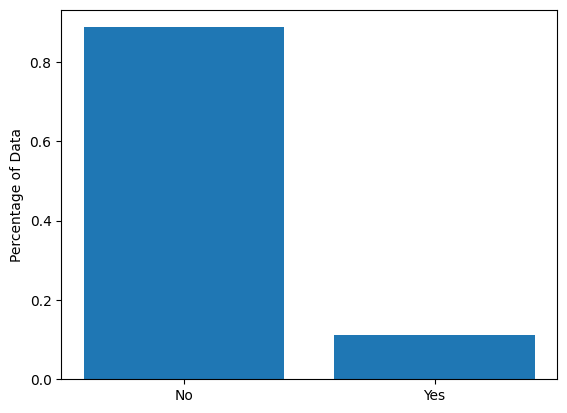

In [44]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [46]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [65]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.219\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.269\nsamples = 18449\nvalue = [15492, 2957]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.103\nsamples = 10342\nvalue = [9777, 565]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.087\nsamples = 10150\nvalue = [9688, 462]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 192\nvalue = [89, 103]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.315\ngini = 0.416\nsamples = 8107\nvalue = [5715, 2392]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 5856\nvalue = [3544, 2312]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.069\nsamples = 2251\nvalue = [2171, 80]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.427\nsamples = 32711\nvalue = [10088, 22623]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.554\ngini = 0.348\nsamples = 26718\nvalue = [6000, 20718]\nclass

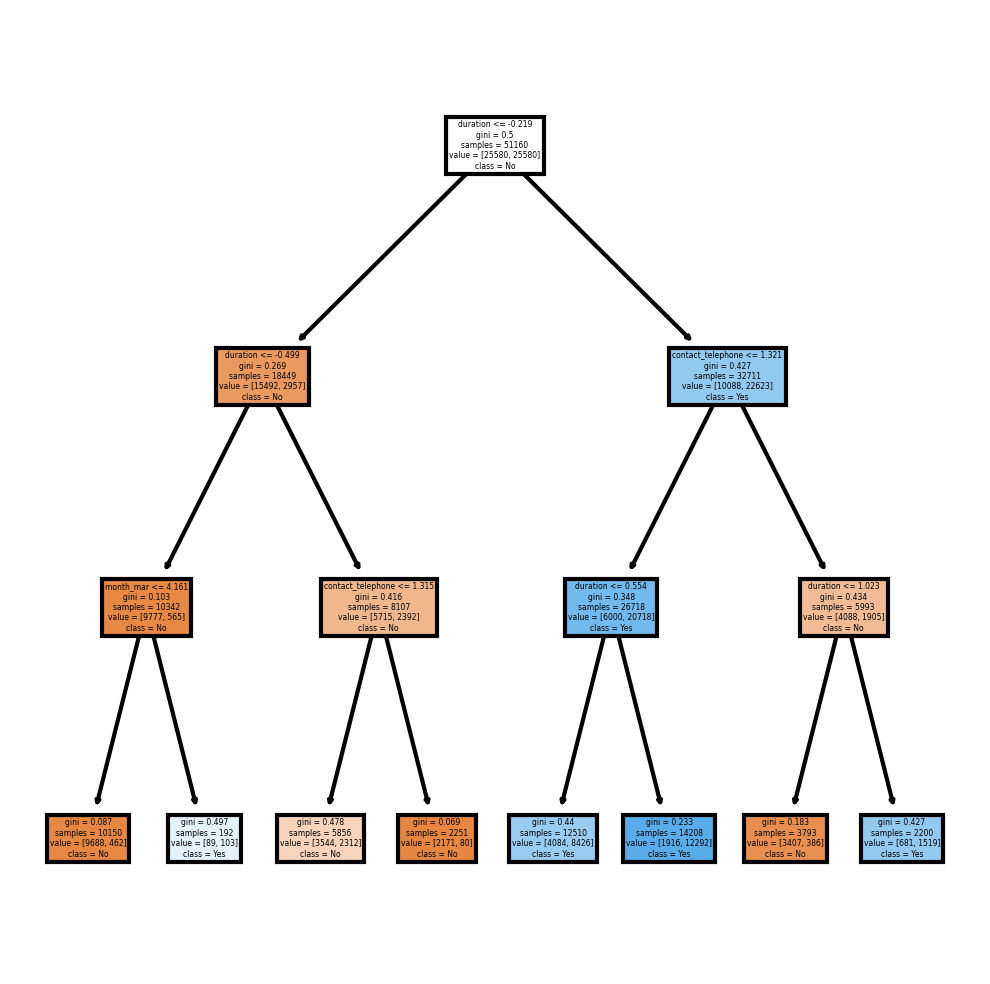

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [49]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [50]:
cm_raw

array([[8057, 2911],
       [ 296, 1093]])

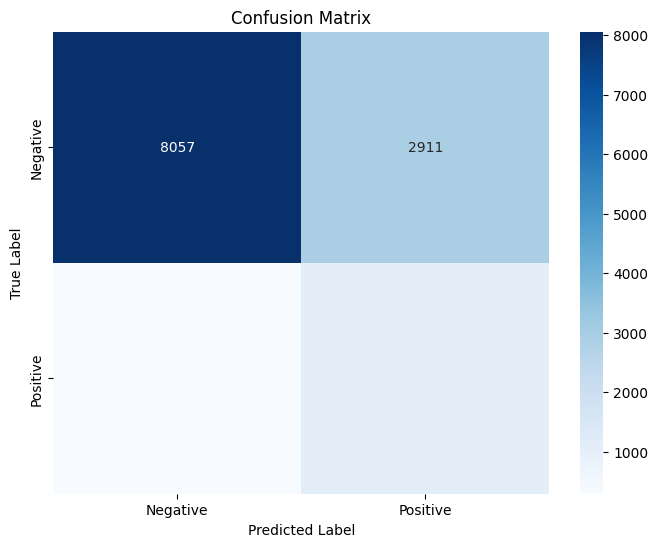

In [51]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
from sklearn.metrics import f1_score

# Calculate F1 score
score = f1_score(y_true, y_pred, average='binary')
print(score)

0.4053402558872613


# 3.) Use bagging on your descision tree

In [53]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [54]:
bagging = BaggingClassifier(estimator = dtree, n_estimators = 100, max_samples = .5, max_features = 1.)
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

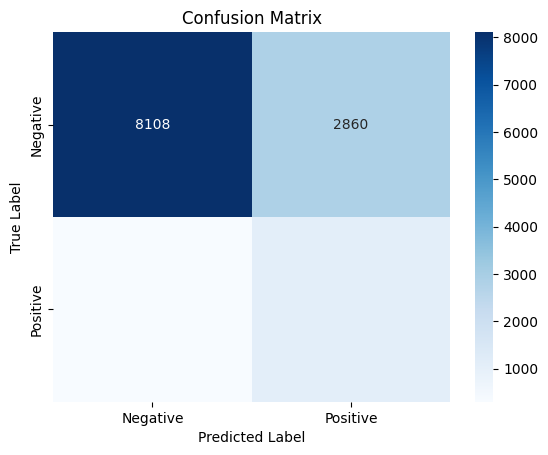

In [55]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
print(cm_raw)

[[8108 2860]
 [ 302 1087]]


In [57]:
# Calculate F1 score
score = f1_score(y_true, y_pred, average='binary')
print(score)

0.4074212893553223


# 4.) Boost your tree

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:

dtree = DecisionTreeClassifier(max_depth = 3)

boost = AdaBoostClassifier(estimator = dtree, n_estimators = 50)
boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

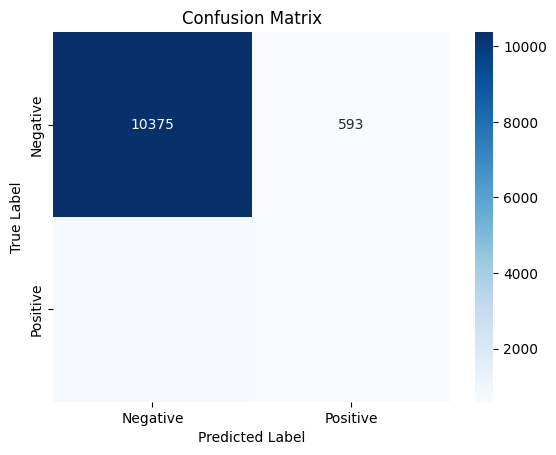

In [60]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
print(cm_raw)

[[10375   593]
 [  745   644]]


In [62]:
# Calculate F1 score
score = f1_score(y_true, y_pred, average='binary')
print(score)

0.4904798172124905


# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [31]:
pip install mlens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from mlens.ensemble import SuperLearner

In [66]:
predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree.predict(X_scaled)]
x_base_learners = np.column_stack(predictions)

In [67]:
super_learner = LogisticRegression()

In [68]:
super_learner.fit(x_base_learners, y_train)

LogisticRegression()

In [69]:
super_learner.coef_

array([[0.60733224, 4.99696336, 0.85621344]])

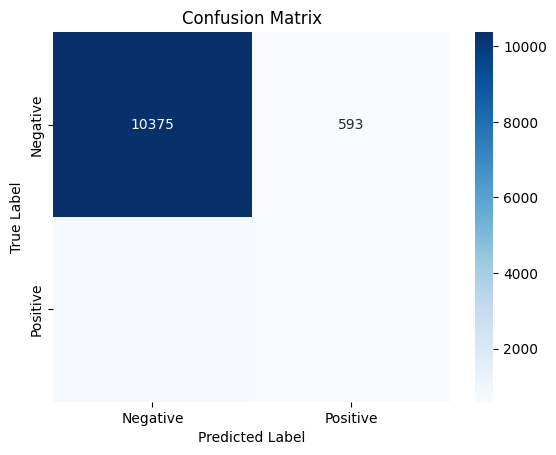

In [70]:
predictions = [bagging.predict(X_test), boost.predict(X_test), dtree.predict(X_test)]

x_base_learners_test = np.column_stack(predictions)


y_true = y_test
y_pred = super_learner.predict(x_base_learners_test)
cm_raw = confusion_matrix(y_true,y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [71]:
print(cm_raw)

[[10375   593]
 [  745   644]]


In [72]:
# Calculate F1 score
score = f1_score(y_true, y_pred, average='binary')
print(score)

0.4904798172124905


# Findings

From these four confusion matrix, we can find that the confusion matrix of my metalearner is close to the confusion matrix of the boosting tree model. And among bagging, bootsing and simple tree models, we find that the boosting tree model has the largest f1 score which means the boosting tree model performs best among these three models. We can also find the same conclusion when we look at the coefficients of our superlearner. We can see that the coefficient of boosting tree model is higher than the other two. 